In [1]:
import pandas as pd
import numpy as np 

In [3]:
df=pd.read_excel(r"C:\Users\Dell\Desktop\Customer_Purchase_Data_May_June_July_7006_Rows.xlsx")

In [5]:
df.head(10)

,Customer_ID,Gender,Age,City,Product_Category,Purchase_Amount,Payment_Method,Purchase_Date
0,3001,Female,18,Calgary,Electronics,586,Cash,2025-05-20
1,3002,Male,38,Montreal,Electronics,614,Debit Card,2025-05-19
2,3003,Male,44,Toronto,Clothing,124,Cash,2025-07-15
3,3004,Female,50,Toronto,Grocery,105,Debit Card,2025-07-29
4,3005,Female,32,Ottawa,Home Appliances,499,Debit Card,2025-06-14
5,3006,Male,54,Ottawa,Electronics,734,Credit Card,2025-05-16
6,3007,Male,42,Calgary,Electronics,634,Credit Card,2025-05-25
7,3008,Female,48,Montreal,Home Appliances,434,Cash,2025-05-18
8,3009,Male,37,Vancouver,Grocery,139,Cash,2025-07-08
9,3010,Female,43,Toronto,Home Appliances,471,Debit Card,2025-05-30


In [37]:
df.shape

(7006, 9)

In [40]:
df.describe()


,Customer_ID,Age,Purchase_Amount,Purchase_Date
count,7006.000000,7006.000000,7006.000000,7006
mean,6503.500000,41.142021,304.952184,2025-06-15 20:58:18.258635520
min,3001.000000,18.000000,10.000000,2025-05-01 00:00:00
25%,4752.250000,29.000000,93.000000,2025-05-24 00:00:00
50%,6503.500000,41.000000,181.000000,2025-06-16 00:00:00
75%,8254.750000,53.000000,508.000000,2025-07-09 00:00:00
max,10006.000000,65.000000,1000.000000,2025-07-31 00:00:00
std,2022.602325,13.763401,265.021002,NaN


In [36]:
df.isnull().sum()

Customer_ID         0
Gender              0
Age                 0
City                0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Purchase_Date       0
Age_Group           0
dtype: int64

# Section A: Descriptive Analytics (30 marks)


#  1.	Summary Statistics (10 marks)
a. Calculate the average purchase amount.
b. Find the highest and lowest purchase amount.



In [6]:
average_purchase = df['Purchase_Amount'].mean()
print(f"Average Purchase Amount: ${average_purchase:.2f}")

Average Purchase Amount: $304.95


In [7]:
highest_purchase = df['Purchase_Amount'].max()
lowest_purchase = df['Purchase_Amount'].min()
print(f"Highest Purchase Amount: ${highest_purchase}")
print(f"Lowest Purchase Amount: ${lowest_purchase}")

Highest Purchase Amount: $1000
Lowest Purchase Amount: $10


# 2.	Demographic Breakdown (10 marks)
a. Count the number of male and female customers.
b. Find the average age of customers purchasing Electronics.


In [8]:
gender_counts = df['Gender'].value_counts()
print("Number of customers by gender:")
print(gender_counts)

Number of customers by gender:
Gender
Male      3514
Female    3492
Name: count, dtype: int64


In [9]:
electronics_age = df[df['Product_Category'] == 'Electronics']['Age'].mean()
print(f"Average age of Electronics customers: {electronics_age:.1f} years")

Average age of Electronics customers: 40.8 years


# 3.	Category Analysis (10 marks)
a. Which product category has the highest total sales?
b. What is the average purchase amount per category?


In [10]:
category_sales = df.groupby('Product_Category')['Purchase_Amount'].sum()
highest_category = category_sales.idxmax()
highest_sales = category_sales.max()
print(f"Category with highest total sales: {highest_category} (${highest_sales})")

Category with highest total sales: Electronics ($956854)


In [11]:
category_avg = df.groupby('Product_Category')['Purchase_Amount'].mean()
print("Average purchase amount per category:")
print(category_avg)

Average purchase amount per category:
Product_Category
Clothing           111.465420
Electronics        535.452714
Grocery             80.526730
Home Appliances    500.548272
Name: Purchase_Amount, dtype: float64


# Section B: Data Visualization (30 marks)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

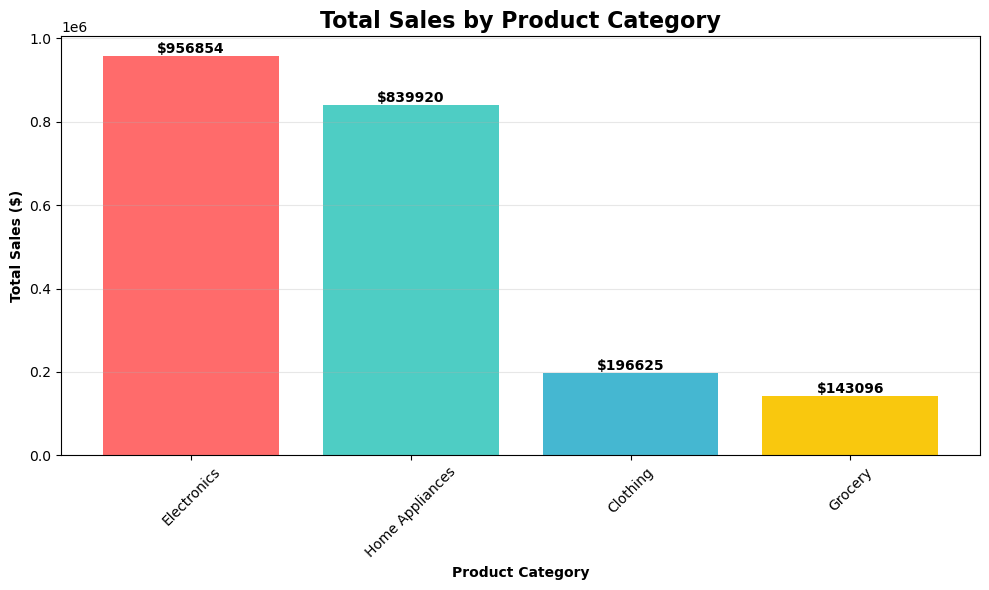

In [15]:
# Calculate total sales by category
category_sales = df.groupby('Product_Category')['Purchase_Amount'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_sales.index, category_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E'])

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Total Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontweight='bold')
plt.ylabel('Total Sales ($)', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

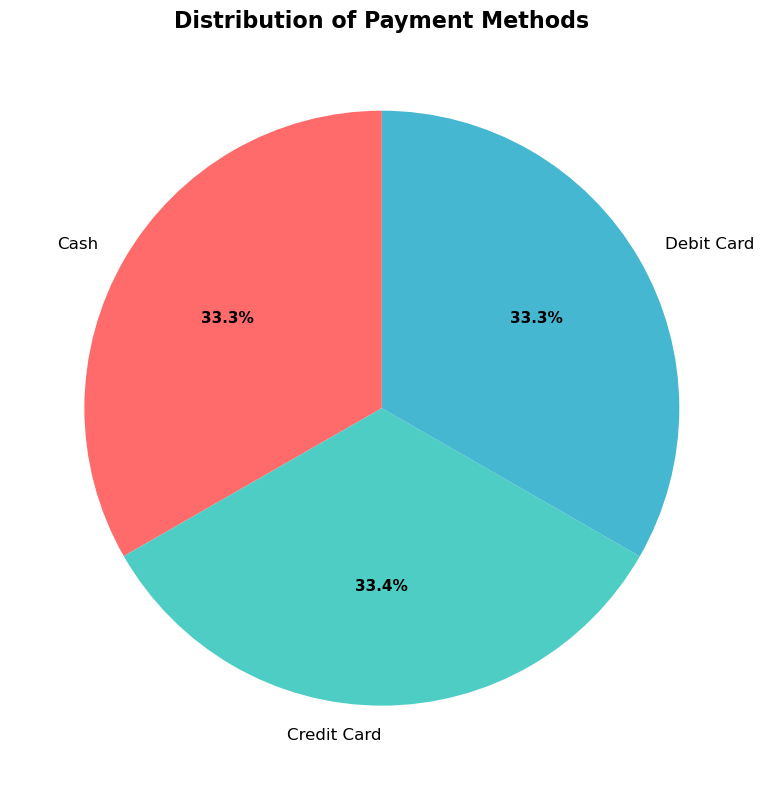

In [16]:
# Calculate total sales by payment method
payment_distribution = df.groupby('Payment_Method')['Purchase_Amount'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
wedges, texts, autotexts = plt.pie(payment_distribution.values, 
                                   labels=payment_distribution.index, 
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   textprops={'fontsize': 12})

# Make percentages bold
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.title('Distribution of Payment Methods', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

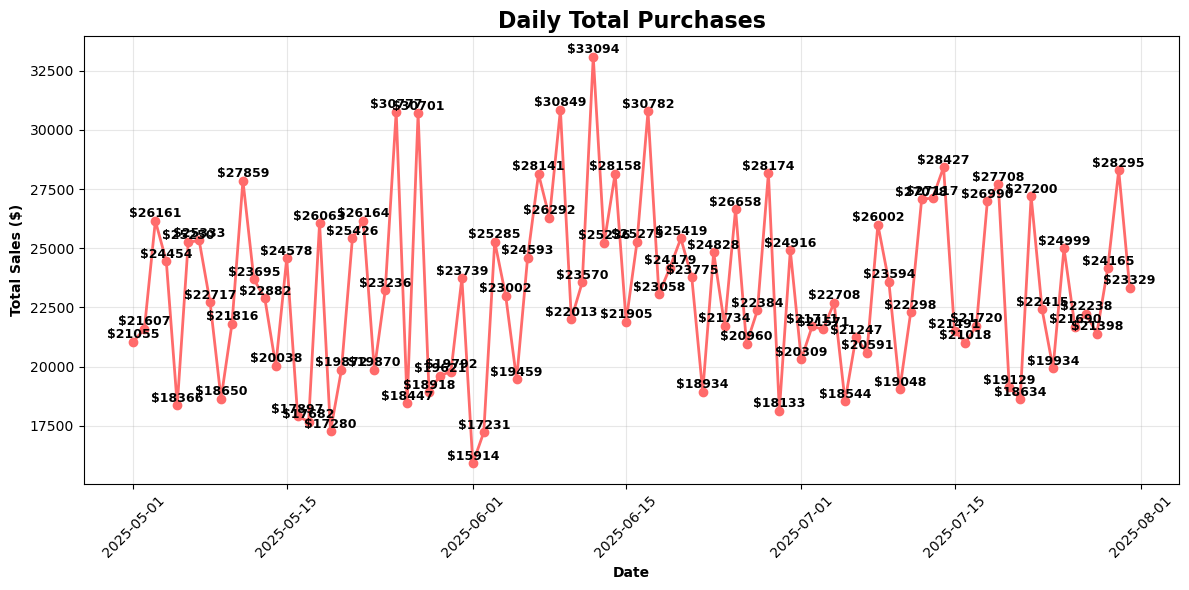

In [17]:
# Convert to datetime and group by date
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
daily_sales = df.groupby('Purchase_Date')['Purchase_Amount'].sum()

# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, 
         marker='o', 
         linewidth=2, 
         markersize=6,
         color='#FF6B6B')

# Add values on data points
for date, amount in daily_sales.items():
    plt.text(date, amount + 20, f'${amount:.0f}', 
             ha='center', va='bottom', 
             fontweight='bold', fontsize=9)

plt.title('Daily Total Purchases', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Total Sales ($)', fontweight='bold')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Section C: Predictive Thinking (20 marks)

# a. Based on the data, what types of customers tend to spend more? (10 marks)
# b. Suggest one strategy to increase sales in the Clothing category. (10 marks)


In [19]:
# 1. Average spend by Gender
spend_by_gender = df.groupby('Gender')['Purchase_Amount'].mean().sort_values(ascending=False)

# 2. Average spend by Age group (binning ages into ranges)
age_bins = [15, 25, 35, 45, 55, 65]
age_labels = ['15-25', '26-35', '36-45', '46-55', '56-65']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)
spend_by_age = df.groupby('Age_Group')['Purchase_Amount'].mean().sort_values(ascending=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5184\4033254247.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spend_by_age = df.groupby('Age_Group')['Purchase_Amount'].mean().sort_values(ascending=False)


In [20]:
# 3. Average spend by City
spend_by_city = df.groupby('City')['Purchase_Amount'].mean().sort_values(ascending=False)

In [21]:
# 4. Average spend by Product Category
spend_by_category = df.groupby('Product_Category')['Purchase_Amount'].mean().sort_values(ascending=False)

In [22]:
# 5. Average spend by Payment Method
spend_by_payment = df.groupby('Payment_Method')['Purchase_Amount'].mean().sort_values(ascending=False)


In [23]:
print("Average Spend by Gender:\n", spend_by_gender, "\n")
print("Average Spend by Age Group:\n", spend_by_age, "\n")
print("Average Spend by City:\n", spend_by_city, "\n")
print("Average Spend by Product Category:\n", spend_by_category, "\n")
print("Average Spend by Payment Method:\n", spend_by_payment, "\n")

Average Spend by Gender:
 Gender
Male      305.462151
Female    304.439003
Name: Purchase_Amount, dtype: float64 

Average Spend by Age Group:
 Age_Group
15-25    321.193012
36-45    308.392857
46-55    306.680277
26-35    302.863366
56-65    287.759366
Name: Purchase_Amount, dtype: float64 

Average Spend by City:
 City
Calgary      318.074878
Montreal     310.400291
Vancouver    302.764331
Toronto      300.426564
Ottawa       292.730797
Name: Purchase_Amount, dtype: float64 

Average Spend by Product Category:
 Product_Category
Electronics        535.452714
Home Appliances    500.548272
Clothing           111.465420
Grocery             80.526730
Name: Purchase_Amount, dtype: float64 

Average Spend by Payment Method:
 Payment_Method
Credit Card    311.863259
Cash           303.921368
Debit Card     299.311737
Name: Purchase_Amount, dtype: float64 



# Conclusion:
# Customers who spend the most are males aged 46–55, primarily from Calgary, purchasing Electronics and Home Appliances, and preferring Credit Cards for payments.

# b. Suggest one strategy to increase sales in the Clothing category. (10 marks)

In [24]:
# Filter only clothing sales
clothing_df = df[df['Product_Category'] == 'Clothing']

In [25]:
# 1. Average purchase amount
avg_purchase = clothing_df['Purchase_Amount'].mean()

In [26]:
# 2. Median purchase amount
median_purchase = clothing_df['Purchase_Amount'].median()

In [27]:
# 3. Most frequent Gender
mode_gender = clothing_df['Gender'].mode()[0]

In [28]:
# 4. Most frequent Age
mode_age = clothing_df['Age'].mode()[0]

In [29]:
# 5. Most frequent City
mode_city = clothing_df['City'].mode()[0]

In [30]:
# 6. Most frequent Payment Method
mode_payment = clothing_df['Payment_Method'].mode()[0]

In [31]:
print("Average Clothing Purchase:", avg_purchase)
print("Median Clothing Purchase:", median_purchase)
print("Most Frequent Gender:", mode_gender)
print("Most Frequent Age:", mode_age)
print("Most Frequent City:", mode_city)
print("Most Frequent Payment Method:", mode_payment)

Average Clothing Purchase: 111.46541950113378
Median Clothing Purchase: 112.0
Most Frequent Gender: Male
Most Frequent Age: 29
Most Frequent City: Toronto
Most Frequent Payment Method: Debit Card


#  Conclusion:
# Clothing sales are mainly driven by young male customers (29 years) in Toronto using Debit Cards, but their average spend is low (₹111). To increase sales, the business should offer targeted debit card cashback and bundle discounts (e.g., Buy 2 Get 1) in Toronto. At the same time, promoting Credit Card offers can encourage higher-value transactions and boost overall Clothing sales.

# 6.	Data Quality & Limitations

In [35]:
# a. What additional data would improve the analysis? (10 marks)
# b. Mention any assumptions made during your analysis. (10 marks)


# Additional Data to Improve the Analysis:

Customer income level and occupation (to link spending capacity).

Customer purchase history and frequency (loyalty/recency insights).

Seasonal or time-based sales data (festivals, weekends vs weekdays).

Promotional/discount data (to measure impact on purchase decisions).

Online vs offline channel data (to identify purchase patterns).